## Pumpkin Pricing

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

- Only get pumpkins priced by the bushel
- Convert the date to a month
- Calculate the price to be an average of high and low prices
- Convert the price to reflect the pricing by bushel quantity

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('../data/US-pumpkins.csv')
bitcoin = pd.read_csv('../data/bitcoindata.csv')
bitcoin['Price'] = bitcoin['Price'].str.replace(',', '').astype(float)
bitcoin['Open'] = bitcoin['Open'].str.replace(',', '').astype(float)
bitcoin['High'] = bitcoin['High'].str.replace(',', '').astype(float)
bitcoin['Low'] = bitcoin['Low'].str.replace(',', '').astype(float)

bitcoin.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,09/04/2024,69092.9,71627.3,71737.2,68615.0,87.93K,-3.54%
1,08/04/2024,71630.1,69358.0,72710.8,69110.5,105.78K,3.27%
2,07/04/2024,69360.4,68897.3,70285.8,68849.4,46.99K,0.68%
3,06/04/2024,68890.6,67830.5,69632.0,67467.2,41.48K,1.56%
4,05/04/2024,67830.6,68498.7,68692.2,66023.3,88.97K,-0.97%


In [36]:


columns_to_select = ['Price', 'Low', 'High', 'Date']
bitcoin = bitcoin.loc[:, columns_to_select]

bitcoin['Date'] = pd.to_datetime(bitcoin['Date'], format='%d/%m/%Y')
month = bitcoin['Date'].dt.month

day_of_year = pd.to_datetime(bitcoin['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_bitcoin = pd.DataFrame(
    {'Date': bitcoin['Date'],
     'DayofYear': day_of_year,
     'Month': month, 
     'Low': bitcoin['Low'],
     'High': bitcoin['High'], 
     'Price': bitcoin['Price']})

new_bitcoin.head()


,Date,DayofYear,Month,Low,High,Price
0,2024-04-09,99,4,68615.0,71737.2,69092.9
1,2024-04-08,98,4,69110.5,72710.8,71630.1
2,2024-04-07,97,4,68849.4,70285.8,69360.4
3,2024-04-06,96,4,67467.2,69632.0,68890.6
4,2024-04-05,95,4,66023.3,68692.2,67830.6


A basic scatterplot reminds us that we only have month data from August through December. We probably need more data to be able to draw conclusions in a linear fashion.

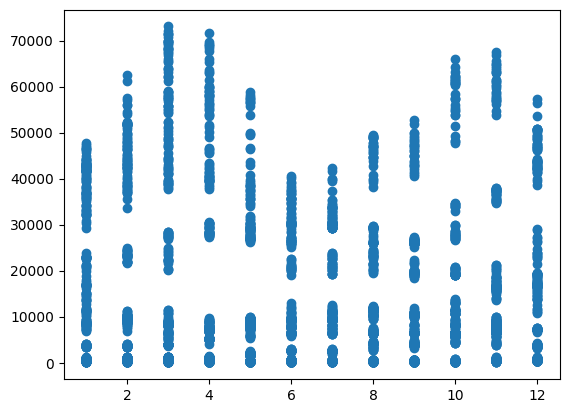

In [37]:
import matplotlib.pyplot as plt
plt.scatter('Month','Price',data=new_bitcoin)

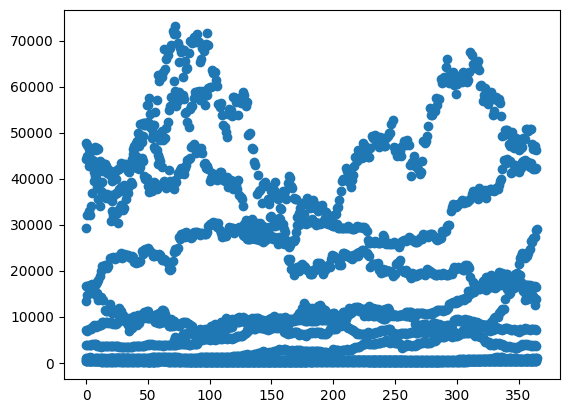

In [39]:

plt.scatter('DayofYear','Price',data=new_bitcoin)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = new_bitcoin['DayofYear'].to_numpy().reshape(-1,1)
y = new_bitcoin['Price']

X.shape

(4051, 1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [45]:
pred = lin_reg.predict(X_test)
pred

array([12418.99832631, 14005.97459149, 12483.77286775, 12656.50497824,
       13185.49706664, 12548.54740918, 12159.90016057, 12915.60314399,
       15128.73330971, 13250.27160807, 14718.49454728, 11922.39350864,
       13444.59523238, 11868.41472411, 13671.3061274 , 14038.36186221,
       14923.6139285 , 13217.88433735, 12062.73834842, 12947.9904147 ,
       15042.36725446, 13584.94007216, 13962.79156387, 13509.36977381,
       13412.20796166, 14837.24787325, 13757.67218265, 11512.15474621,
       14189.50245889, 12678.09649206, 13898.01702243, 15301.46542021,
       12591.73043681, 14470.19213845, 12904.80738708, 13779.26369646,
       11922.39350864, 14858.83938706, 15333.85269092, 15333.85269092,
       12818.44133183, 14880.43090087, 13530.96128763, 12159.90016057,
       13282.65887879, 14167.91094508, 12105.92137604, 11587.72504455,
       13530.96128763, 14599.74122132, 13498.57401691, 13142.31403901,
       14696.90303347, 14804.86060253, 15301.46542021, 15096.34603899,
      

In [46]:
mse = np.sqrt(mean_squared_error(y_test,pred))

print(f"Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)")

Mean error: 1.75e+04 (1.3e+02%)


In [47]:
score = lin_reg.score(X_train, y_train)
print('Model determination: ', score)


Model determination:  0.00461563974840018


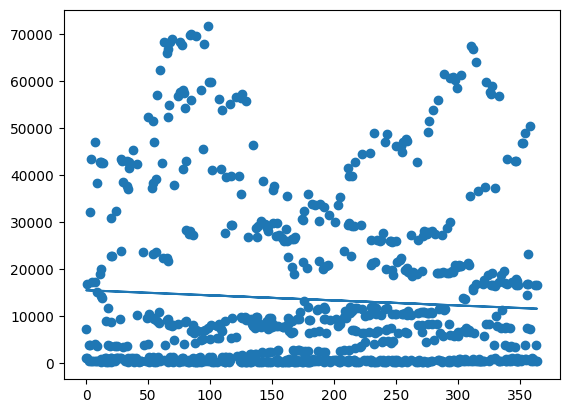

In [48]:
plt.scatter(X_test,y_test)

plt.plot(X_test,pred)

In [57]:
lin_reg.predict([[100]])

array([14351.43881248])

Mean error: 17509.128318231687 (131.79833061203857%)


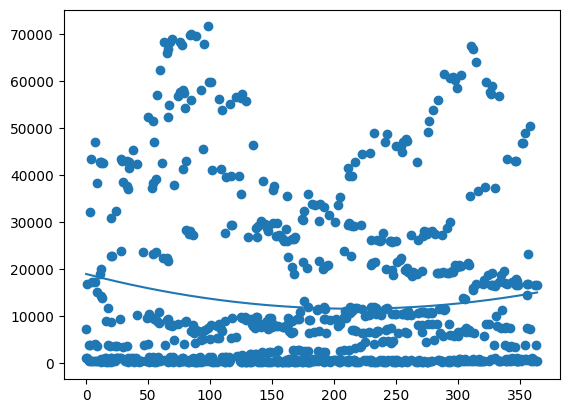

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test, pred))
print(f'Mean error: {mse:3} ({mse/np.mean(pred)*100:3}%)')

plt.scatter(X_test, y_test)
plt.plot(sorted(X_test), pipeline.predict(sorted(X_test)))